# EDA extensive exploratory data analysis

In [1]:
#head packages import
import gc
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

pd.set_option('display.max_columns' ,30) #setting as None for all row and cols
pd.set_option('display.max_rows' , 10)

train_x = np.load("./Training data/X_train.npy")
train_y = np.load("./Training data/y_train.npy")
test_x  = np.load("./Testing data/X_test.npy")

1. Data overview

In [2]:
train_x = pd.DataFrame(train_x).rename(columns={i: f"x_{i}" for i in range(111)})
train_y = pd.DataFrame(train_y).rename(columns={i: f"y_{i}" for i in range(11)})


test_x = pd.DataFrame(test_x).rename(columns={i: f"x_{i}" for i in range(111)})
pd.concat([train_x.head(), train_x.tail()])

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,...,x_96,x_97,x_98,x_99,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,x_108,x_109,x_110
0,57.0,5.0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,1.0,3.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,71.0,2.0,2.0,NaN,NaN,2.0,NaN,3.0,0.0,7.0,4.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,NaN,NaN,5.0,NaN,NaN,4.0,0.0,0.0,0.0,0.0,0.0,1.0
2,64.0,2.0,0.0,NaN,NaN,2.0,NaN,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,7.0,2.0,4.0,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
3,74.0,1.0,1.0,6.0,2.0,2.0,NaN,2.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,74.0,2.0,0.0,6.0,2.0,0.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,8.0,0.0,6.0,0.0,5.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0
995,86.0,4.0,0.0,0.0,0.0,0.0,NaN,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,5.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,91.0,3.0,0.0,0.0,0.0,0.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,3.0,NaN,5.0,0.0,NaN,3.0,0.0,0.0,0.0,0.0,0.0,0.0
997,46.0,4.0,0.0,0.0,2.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,2.0,5.0,0.0,1.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0
998,70.0,2.0,1.0,2.0,2.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,5.0,2.0,4.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
999,60.0,2.0,0.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,2.0,5.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3]:
train_y

,y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,1,1
4,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,1,0,0,1,0,0,0,0
996,0,0,0,0,1,0,1,0,0,1,1
997,0,1,0,1,1,0,0,1,1,0,1
998,0,1,0,1,1,0,0,0,0,0,0


In [4]:
train_x.describe()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,...,x_96,x_97,x_98,x_99,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,x_108,x_109,x_110
count,995.000000,1000.000000,998.000000,933.000000,954.000000,966.000000,37.0,995.000000,996.000000,847.000000,966.000000,984.000000,984.0,984.000000,984.000000,...,618.000000,997.000000,997.000000,932.000000,918.000000,993.000000,931.000000,919.000000,995.000000,996.000000,995.000000,992.000000,992.000000,993.000000,993.000000
mean,65.179899,3.657000,0.444890,2.260450,1.190776,1.083851,0.0,1.413065,0.026104,3.341204,0.166667,0.006098,0.0,0.006098,0.013211,...,0.231392,0.066199,0.396189,3.084764,3.037037,3.290030,0.068743,2.968444,3.290452,0.072289,0.407035,0.428427,0.444556,0.011078,0.125881
std,11.492400,1.825564,0.816375,2.479035,1.053291,0.872260,0.0,1.083640,0.159526,3.121343,0.634228,0.077888,0.0,0.077888,0.114237,...,0.422064,0.248754,0.777769,1.782570,1.702760,1.827344,0.364560,1.758293,1.872994,0.259096,0.491529,0.495100,0.497167,0.104718,0.331883
min,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.000000,3.000000,0.000000,1.000000,2.000000,1.000000,0.0,2.000000,0.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73.000000,5.000000,1.000000,5.000000,2.000000,2.000000,0.0,2.000000,0.000000,7.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,1.000000,4.000000,4.000000,4.000000,0.000000,4.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,97.000000,13.000000,3.000000,6.000000,4.000000,2.000000,0.0,3.000000,1.000000,7.000000,4.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,4.000000,10.000000,11.000000,10.000000,3.000000,9.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 111 entries, x_0 to x_110
dtypes: float64(111)
memory usage: 867.3 KB


2. Check missing and unique values

In [6]:
cols = [f"x_{i}" for i in range(111)]
data = pd.concat([train_x, test_x])

tmp = pd.DataFrame()
tmp['count'] = data[cols].count().values
tmp['missing_rate'] = (data.shape[0] - tmp['count']) / data.shape[0]
tmp['nunique'] = data[cols].nunique().values
tmp.index = cols
tmp

,count,missing_rate,nunique
x_0,1692,0.004706,65
x_1,1700,0.000000,12
x_2,1696,0.002353,4
x_3,1594,0.062353,7
x_4,1627,0.042941,4
...,...,...,...
x_106,1687,0.007647,2
x_107,1683,0.010000,2
x_108,1683,0.010000,2
x_109,1684,0.009412,2


a:\16_Environments\2_Python\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='x_1'>

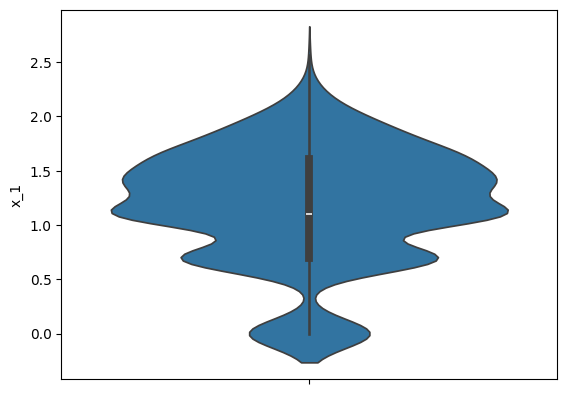

In [7]:
sns.violinplot(np.log(train_x["x_1"]))

3. Check distribution of training data

a:\16_Environments\2_Python\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


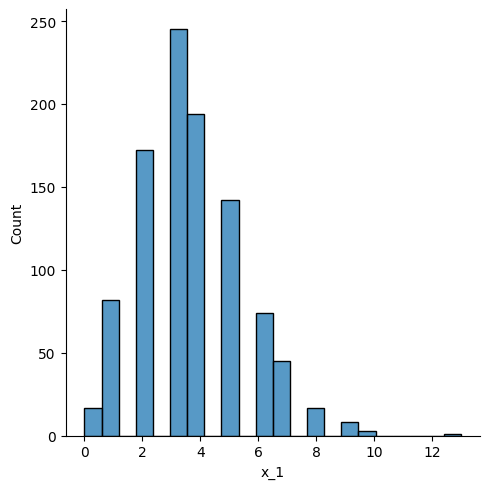

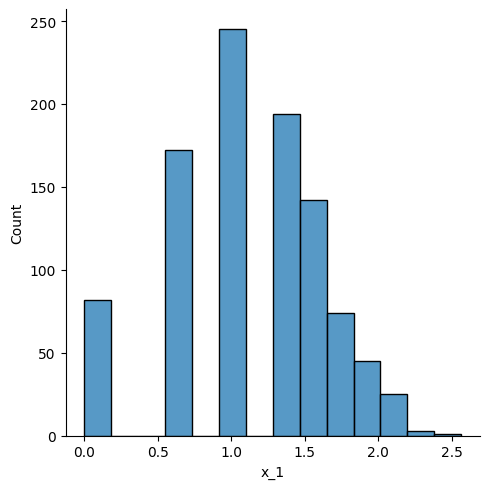

In [8]:
sns.displot(train_x["x_1"])
sns.displot(np.log(train_x["x_1"]))

4. Analyse feature skewness and kurtosis

In [9]:
pd.set_option('display.max_rows' , 10)
tmp = pd.DataFrame(index = cols)
for col in cols:
    tmp.loc[col, 'train_Skewness'] = train_x[col].skew()
    tmp.loc[col, 'test_Skewness'] = test_x[col].skew()
    tmp.loc[col, 'train_Kurtosis'] = train_x[col].kurt()
    tmp.loc[col, 'test_Kurtosis'] = test_x[col].kurt()
tmp

# Training set and testing set vary from skewness and kurtosis at some places

,train_Skewness,test_Skewness,train_Kurtosis,test_Kurtosis
x_0,-0.172637,-0.250804,-0.313356,0.045840
x_1,0.652389,0.541898,0.783468,0.374830
x_2,1.779331,1.731573,2.142364,1.877772
x_3,0.475495,0.487082,-1.462243,-1.490582
x_4,-0.095145,0.008162,-1.523081,-1.502880
...,...,...,...,...
x_106,0.379030,0.328737,-1.860079,-1.897424
x_107,0.289708,0.207042,-1.919944,-1.962823
x_108,0.223488,0.165903,-1.953997,-1.978210
x_109,9.356727,9.805188,85.720983,94.414984


In [10]:
# Analyse correlation of features and every y_j
data_train = pd.concat([train_x, train_y], axis=1)
correlations = pd.DataFrame()
for c in train_y.columns:
    correlations[c] = data_train[list(train_x.columns) + [c]].corr()[c]
    correlations[c].sort_values(ascending=False).head()


y_0     1.000000
x_87    1.000000
x_94    0.104285
x_39    0.097980
x_11    0.096390
Name: y_0, dtype: float64

x_37    0.091573
x_30    0.065053
x_63    0.064341
x_24    0.061082
x_47    0.060816
Name: y_1, dtype: float64

x_72    0.073109
x_46    0.072577
x_47    0.059400
x_79    0.059253
x_5     0.056017
Name: y_2, dtype: float64

x_70     0.104725
x_73     0.066362
x_94     0.064405
x_100    0.063144
x_42     0.062650
Name: y_3, dtype: float64

x_81     0.085354
x_59     0.074249
x_102    0.062749
x_19     0.057621
x_1      0.053413
Name: y_4, dtype: float64

x_9     0.119526
x_94    0.102871
x_98    0.092996
x_97    0.082851
x_2     0.075621
Name: y_5, dtype: float64

x_33    0.077120
x_91    0.073548
x_26    0.066815
x_53    0.063064
x_30    0.062323
Name: y_6, dtype: float64

x_94     0.076954
x_50     0.074942
x_29     0.064896
x_104    0.063456
x_68     0.059105
Name: y_7, dtype: float64

x_87     1.000000
x_33     0.096403
x_102    0.081900
x_34     0.075662
x_44     0.072638
Name: y_8, dtype: float64

x_87    1.000000
x_33    0.162011
x_34    0.109850
x_94    0.071808
x_43    0.068742
Name: y_9, dtype: float64

x_33    0.109333
x_34    0.104504
x_69    0.079865
x_5     0.071705
x_90    0.066189
Name: y_10, dtype: float64

4.1 Transform to fix important features

In [11]:
# Filled up missing values
for column in train_x.columns:
    train_x.fillna({column: train_x[column].median()}, inplace=True)
    test_x.fillna({column: test_x[column].median()}, inplace=True)

# filter out less valued columns
threshold = 0.01  
cols_to_drop = [col for col in train_x.columns if (train_x[col] != 0).mean() < threshold]
cols_to_drop += ["x_8",  "x_26", "x_29", "x_30", "x_32", "x_39", "x_50", "x_53", "x_54", "x_64", "x_68", "x_71", "x_93", "x_102"]

train_x.drop(columns=cols_to_drop, inplace=True)
test_x.drop(columns=cols_to_drop, inplace=True)

from scipy.stats import yeojohnson
# Yeo-Johnson transform
train_log = train_x.apply(lambda x: yeojohnson(x)[0])
test_log = test_x.apply(lambda x: yeojohnson(x)[0])



# Logarithm transform
# train_log = train_x.apply(lambda x: np.log1p(x))
# test_log = test_x.apply(lambda x: np.log1p(x))


# sqrt transform
# train_log = train_x.apply(lambda x: np.sqrt(x))
# test_log = test_x.apply(lambda x: np.sqrt(x))


train_skewness = train_log.apply(lambda x: x.skew())
test_skewness = test_log.apply(lambda x: x.skew())
train_kurtosis = train_log.apply(lambda x: x.kurt())
test_kurtosis = test_log.apply(lambda x: x.kurt())

summary = pd.DataFrame({
    'train_skewness': train_skewness,
    'test_skewness': test_skewness,
    'train_kurtosis': train_kurtosis,
    'test_kurtosis': test_kurtosis
})

# Define threshold
skew_threshold = 1.0
kurtosis_threshold = 5.0

pd.set_option('display.max_rows' , None)


large_diff_skew = summary[(abs(summary['train_skewness'] - summary['test_skewness']) > skew_threshold)]
large_diff_kurtosis = summary[(abs(summary['train_kurtosis'] - summary['test_kurtosis']) > kurtosis_threshold)]

# Check differences
print("Columns with large skewness differences:")
print(large_diff_skew)

print("\nColumns with large kurtosis differences:")
print(large_diff_kurtosis)

Columns with large skewness differences:
Empty DataFrame
Columns: [train_skewness, test_skewness, train_kurtosis, test_kurtosis]
Index: []

Columns with large kurtosis differences:
       train_skewness  test_skewness  train_kurtosis  test_kurtosis
x_14         8.611542       8.203828       72.303253      65.489902
x_34         1.306545       0.878386       27.680777      13.951292
x_49         5.326174       4.359394       26.420972      17.053027
x_58         5.966153       6.399125       33.662303      39.060396
x_73         5.326174       6.194006       26.420972      36.469899
x_76         7.056933       6.194006       47.896086      36.469899
x_87        -0.164990       0.782885      499.512111     349.772811
x_109        9.390670       9.870534       86.357390      95.700872


In [12]:
# Analyse correlation of features and every y_j
data_train = pd.concat([train_x, train_y], axis=1)
correlations = pd.DataFrame()
for c in train_y.columns:
    correlations[c] = data_train[list(train_x.columns) + [c]].corr()[c]
    correlations[c].sort_values(ascending=False).head()

y_0     1.000000
x_0     0.091839
x_58    0.080054
x_94    0.074590
x_96    0.050642
Name: y_0, dtype: float64

x_37     0.091130
x_92     0.046142
x_28     0.045929
x_100    0.041578
x_38     0.039791
Name: y_1, dtype: float64

x_46    0.070467
x_5     0.056524
x_37    0.050471
x_56    0.049821
x_76    0.049447
Name: y_2, dtype: float64

x_73     0.062120
x_100    0.059870
x_46     0.055460
x_97     0.054986
x_94     0.054364
Name: y_3, dtype: float64

x_81     0.070850
x_1      0.053413
x_98     0.050402
x_99     0.041901
x_105    0.037940
Name: y_4, dtype: float64

x_9     0.111283
x_98    0.093839
x_94    0.093233
x_97    0.083283
x_2     0.074917
Name: y_5, dtype: float64

x_91    0.073156
x_56    0.059969
x_98    0.056269
x_33    0.045637
x_43    0.043989
Name: y_6, dtype: float64

x_104    0.062942
x_94     0.058538
x_14     0.058129
x_25     0.054023
x_105    0.048929
Name: y_7, dtype: float64

x_10    0.070756
x_44    0.070263
x_37    0.066567
x_0     0.061353
x_33    0.060726
Name: y_8, dtype: float64

x_33    0.096476
x_34    0.065040
x_3     0.063187
x_43    0.057896
x_91    0.052329
Name: y_9, dtype: float64

x_5      0.070758
x_33     0.066109
x_90     0.063929
x_100    0.062764
x_4      0.061106
Name: y_10, dtype: float64

5. Analyse types of feature values

In [13]:
# The print out is features amount of values in type 
multitags = []
for col in list(train_x.columns):
    col, len(train_x[col].value_counts())
    if len(train_x[col].value_counts()) > 20:
        multitags.append(col)

('x_0', 61)

('x_1', 12)

('x_2', 4)

('x_3', 7)

('x_4', 4)

('x_5', 3)

('x_7', 4)

('x_9', 8)

('x_10', 5)

('x_14', 2)

('x_25', 2)

('x_28', 2)

('x_33', 27)

('x_34', 69)

('x_35', 129)

('x_36', 86)

('x_37', 10)

('x_38', 2)

('x_43', 5)

('x_44', 5)

('x_45', 5)

('x_46', 5)

('x_48', 2)

('x_49', 2)

('x_52', 2)

('x_56', 2)

('x_57', 2)

('x_58', 2)

('x_73', 2)

('x_76', 2)

('x_81', 2)

('x_82', 45)

('x_83', 797)

('x_84', 39)

('x_85', 827)

('x_86', 825)

('x_87', 3)

('x_88', 927)

('x_89', 885)

('x_90', 921)

('x_91', 4)

('x_92', 3)

('x_94', 2)

('x_95', 2)

('x_96', 2)

('x_97', 2)

('x_98', 5)

('x_99', 11)

('x_100', 12)

('x_101', 11)

('x_103', 10)

('x_104', 11)

('x_105', 2)

('x_106', 2)

('x_107', 2)

('x_108', 2)

('x_109', 2)

('x_110', 2)